AI & ML Internship – Task 4
Title: Logistic Regression - Diabetes Classification



This notebook implements logistic regression on the Pima Indians Diabetes Dataset
to predict diabetes outcomes based on health metrics.


# Task 4 - Logistic Regression Classification

This notebook applies logistic regression to a binary classification task:
predicting whether a patient has diabetes using medical predictor features.

## Dataset
**Pima Indians Diabetes Dataset**  
- Source: UCI Machine Learning Repository  
- Format: Local CSV (no headers)

## Objective
Build a binary classifier using logistic regression, evaluate model performance,
and analyze the impact of adjusting the classification threshold.


## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)


## Step 2: Load the Dataset 


In [2]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv("pima-indians-diabetes.data.csv", names=columns)


## Step 3: Preliminary Data Check

In [4]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.head()

Dataset shape: (768, 9)

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 4: Train-Test Split
Split the data into training and testing sets with stratification to preserve class ratio.


In [5]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Step 5: Feature Scaling
Standardize the features using `StandardScaler` to improve model performance.

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 6: Model Training
Train a logistic regression model using the scaled training data.

In [7]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Step 7: Predictions
Generate predictions and probabilities on the test data.

In [8]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

## Step 8: Evaluation Metrics
Use confusion matrix, precision, recall, F1-score, and ROC-AUC to evaluate model performance.

In [9]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[82 18]
 [26 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Precision: 0.6086956521739131
Recall: 0.5185185185185185
ROC-AUC Score: 0.8229629629629629


## Step 9: ROC Curve
Visualize the ROC curve to understand model performance across thresholds.

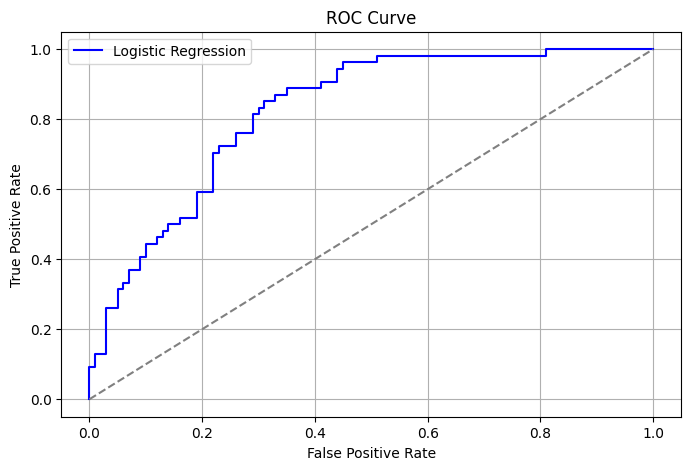

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## Step 10: Threshold Tuning
Adjust the classification threshold to observe changes in precision and recall.

In [11]:
custom_threshold = 0.3
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print(f"\nMetrics at Threshold = {custom_threshold}")
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))


Metrics at Threshold = 0.3
Precision: 0.5945945945945946
Recall: 0.8148148148148148
Confusion Matrix:
 [[70 30]
 [10 44]]


## Extra: Sigmoid Function Plot
Visualize the sigmoid curve used by logistic regression to convert outputs to probabilities.

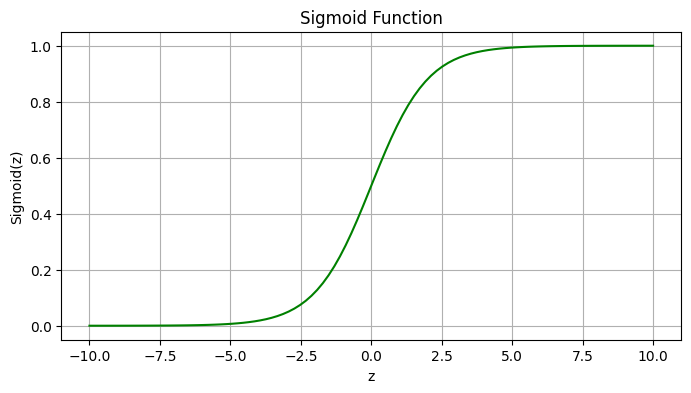

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.figure(figsize=(8, 4))
plt.plot(z, sig, color='green')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()